基于data.csv 数据，建立mlp模型，计算器在测试数据上的准确率，并可视化预测结果。

1.  进行数据分离: test_size=0.33, random_state=10
2.  模型结构为：1层隐藏层，有20个神经元

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/data_mlp.csv')
X=data.drop(['y'],axis=1)
y=data.loc[:,'y']
X.head()

,x1,x2
0,0.624630,0.700556
1,0.415858,0.277949
2,0.854931,0.760743
3,0.295350,0.644887
4,0.824491,0.806131


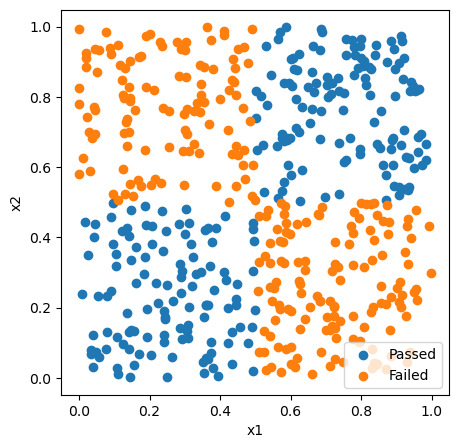

In [2]:
#visualization of data
import matplotlib.pyplot as plt
fit1 = plt.figure(figsize=(5, 5))
passed = plt.scatter(X.loc[:,'x1'][y==1], X.loc[:,'x2'][y==1])
failed = plt.scatter(X.loc[:,'x1'][y==0], X.loc[:,'x2'][y==0])
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [3]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,X.shape, y.shape)

(335, 2) (165, 2) (335,) (165,) (500, 2) (500,)


In [6]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, Input
# 定义 MLP 模型
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=20, activation='sigmoid'),  # 输入层和第一个隐藏层
    Dense(units=1, activation='sigmoid')  # 输出层，2 个类别，使用 softmax 激活函数
])


model.summary()  # 打印模型结构



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [8]:
# 训练模型
model.fit(X_train, y_train, epochs=3000)



Epoch 1/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7342
Epoch 2/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7295 
Epoch 3/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7091 
Epoch 4/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7091 
Epoch 5/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6978 
Epoch 6/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6956  
Epoch 7/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6943 
Epoch 8/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6936 
Epoch 9/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6951 
Epoch 10/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6937 
Epoch 11/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6943 
Epoch 12/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6922 
Epoch 13/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6934 
Epoch 14/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6931 
Epoch 15/3000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s

In [9]:
# 计算准确率

from sklearn.metrics import accuracy_score
y_test_pred = np.round(model.predict(X_test)).astype(int)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

y_train_pred = np.round(model.predict(X_train)).astype(int)
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Accuracy: 0.9575757575757575
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train Accuracy: 0.9880597014925373


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


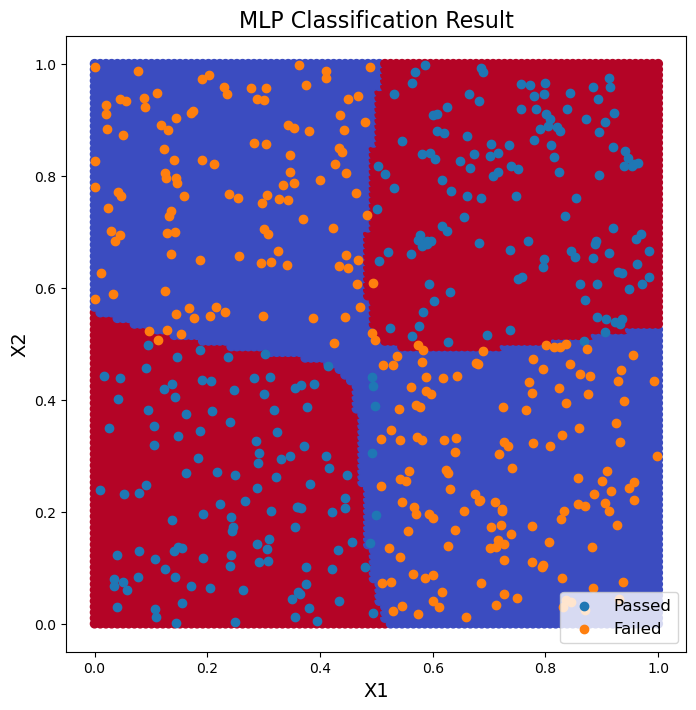

In [10]:
# 可视化预测结果
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
X_grid = np.c_[xx.ravel(),yy.ravel()]
Z = np.round(model.predict(X_grid)).astype(int)

fig2 = plt.figure(figsize=(8,8))
plt.scatter(X_grid[:,0],X_grid[:,1],c=Z,cmap='coolwarm')
passed = plt.scatter(X.loc[:,'x1'][y==1], X.loc[:,'x2'][y==1])
failed = plt.scatter(X.loc[:,'x1'][y==0], X.loc[:,'x2'][y==0])
plt.legend((passed,failed),('Passed','Failed'),scatterpoints=1,loc='lower right',ncol=1,fontsize=12)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
plt.title('MLP Classification Result',fontsize=16)
plt.show()